In [490]:
import numpy as np
import matplotlib.pyplot as plt
import utils
from scipy.special import expit

In [491]:
def sigmoid(a):
    return expit(a)


class nn_autoencoder:
    def __init__(self, input_size, hidden_size):

        self.W1 = 0.1 * np.random.randn(input_size, hidden_size)
        self.W2 = 0.1 * np.random.randn(hidden_size, input_size)

    def forward(self, u):
        z = np.matmul(u, self.W1)
        h = sigmoid(z)
        v = np.matmul(h, self.W2)
        return v, h, z


In [492]:
train_size = 60000
test_size = 10000

data = utils.read_mnist_image(
    "datasets/train-images-idx3-ubyte.gz",
    28,
    28,
    train_size,
) / 255

data_test = utils.read_mnist_image(
    "datasets/t10k-images-idx3-ubyte.gz",
    28,
    28,
    test_size,
) / 255

In [493]:
#loss function as defined above
def loss_mse(preds, targets):
    loss = np.sum((preds - targets)**2)
    return 0.5 * loss

#derivative of loss function with respect to predictions
def loss_deriv(preds, targets):
    dL_dPred = preds - targets
    return dL_dPred

In [494]:
#derivative of the sigmoid function
def sigmoid_prime(a):
    dsigmoid_da = sigmoid(a)*(1-sigmoid(a))
    return dsigmoid_da

def backprop(W1, W2, dL_dPred, U, H, Z):
    dL_dW2 = np.matmul(H.T, dL_dPred)
    dL_dH = np.matmul(dL_dPred, W2.T)
    dL_dZ = np.multiply(sigmoid_prime(Z), dL_dH)
    dL_dW1 = np.matmul(U.T, dL_dZ)
    
    return dL_dW1, dL_dW2

In [495]:
def generate_batch(inputs, targets, batch_size):
        assert len(inputs) == len(targets)
        rng = np.random.default_rng()
        rand_inds = rng.choice(
            np.arange(0, len(inputs)), size=batch_size, replace=False
        )
        inputs_batch = inputs[rand_inds]
        targets_batch = targets[rand_inds]
        return inputs_batch, targets_batch

def train_one_batch(nn, inputs, batch_size, lr):
    inputs, targets = generate_batch(inputs, inputs, batch_size)
    preds, H, Z = nn.forward(inputs)

    loss = loss_mse(preds, inputs)

    dL_dPred = loss_deriv(preds, inputs)
    dL_dW1, dL_dW2 = backprop(nn.W1, nn.W2, dL_dPred, U=inputs, H=H, Z=Z)

    nn.W1 -= lr * dL_dW1
    nn.W2 -= lr * dL_dW2
    
    return loss, preds

#test the network on a given dataset
def test(nn, dataset):
    inputs, targets = generate_batch(dataset, batch_size=200)
    preds, H, Z = nn.forward(inputs) 
    loss = loss_mse(preds, targets)
    return loss

In [496]:
batch_size = 256 #number of examples per batch
nbatches = 6000 #number of batches used for training
lr = 0.0005 #learning rate

nn = nn_autoencoder(784, 50)

losses = [] #training losses to record
outputs = []
for i in range(nbatches):
    loss, preds = train_one_batch(nn, data, batch_size=batch_size, lr=lr)
    losses.append(loss / batch_size)
    outputs.append(preds[0])

Text(0, 0.5, 'training MSE')

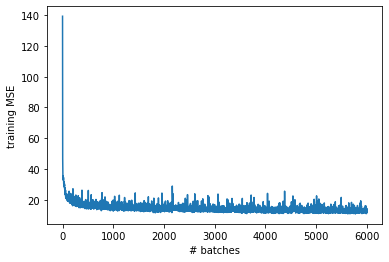

In [497]:
plt.plot(np.arange(0, nbatches), losses)
plt.xlabel("# batches")
plt.ylabel("training MSE")

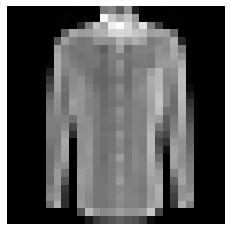

In [589]:
images = (data[300], data[3000])
plt.axis('off')
plt.imshow(images[1].reshape(28,28), cmap='gray')

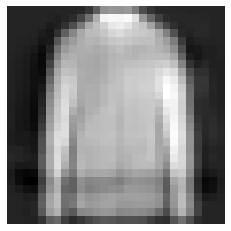

In [590]:
output, h, z = nn.forward(images)
plt.axis('off')
plt.imshow(output[1].reshape(28,28), cmap='gray')

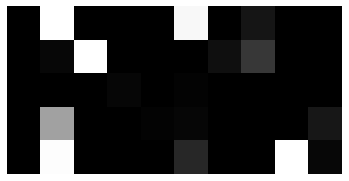

In [597]:
plt.axis('off')
plt.imshow(h[1].reshape(5, 10), cmap='gray')